<a href="https://colab.research.google.com/github/FarshadAmiri/Structural_Engineering/blob/master/Mahdi_structures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [319]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import StratifiedKFold
import pandas as pd
import numpy as np
import time

In [320]:
# Dataset = pd.read_excel(r'https://github.com/FarshadAmiri/Structrual_Design_Optimization/blob/master/Dataset%20(213%20samples).xlsx?raw=true')
Dataset = pd.read_excel(r'https://github.com/FarshadAmiri/Structural_Engineering/blob/master/D600.xlsx?raw=true')

# Dataset = pd.read_excel(r'https://github.com/FarshadAmiri/Structural_Engineering/blob/master/D608-m.xlsx?raw=true')
cols = ['Mu33','Mu22','Pu','L','Cb','Delta']

for col in cols:
    col_zscore = col + '_zscore'
    Dataset[col_zscore] = (Dataset[col] - Dataset[col].mean())/Dataset[col].std(ddof=0)


In [321]:
#Defining Trainig data and Test Data
shuffled_dataset = Dataset.reindex(np.random.permutation(Dataset.index))

train_df = shuffled_dataset[:530]
test_df  = shuffled_dataset[530:]

In [322]:
#@title Assigning features and targets
#  assigning features and targets

# x = np.column_stack((train_df.Mu33.values , train_df.Mu22.values, train_df.Pu.values, train_df.L.values, train_df.Cb.values, train_df.Delta.values, train_df.L1tb.values))
# y = np.column_stack((train_df.h.values, train_df.b.values, train_df.tf.values, train_df.tw.values))

# test_x = np.column_stack((test_df.Mu33.values , test_df.Mu22.values, test_df.Pu.values, test_df.L.values, test_df.Cb.values, test_df.Delta.values, test_df.L1tb.values))
# test_y = np.column_stack((test_df.h.values, test_df.b.values, test_df.tf.values, test_df.tw.values))

#Trying 'Z score'
x = np.column_stack((train_df.Mu33_zscore.values , train_df.Mu22_zscore.values, train_df.Pu_zscore.values, train_df.L_zscore.values, train_df.Cb_zscore.values, train_df.Delta_zscore.values, train_df.L1tb.values))
y = np.column_stack((train_df.h.values, train_df.b.values, train_df.tf.values, train_df.tw.values))

test_x = np.column_stack((test_df.Mu33_zscore.values , test_df.Mu22_zscore.values, test_df.Pu_zscore.values, test_df.L_zscore.values, test_df.Cb_zscore.values, test_df.Delta_zscore.values,  test_df.L1tb.values))
test_y = np.column_stack((test_df.h.values, test_df.b.values, test_df.tf.values, test_df.tw.values))

In [323]:
# Declaring the Model
Lambda = 0.01
nn = 128
model = keras.Sequential([
    keras.layers.Dense(nn,input_shape=(7,),activation='relu',kernel_regularizer= tf.keras.regularizers.L2(l2=Lambda)),
    keras.layers.Dense(nn,activation='relu', kernel_regularizer= tf.keras.regularizers.L2(l2=Lambda)),
    keras.layers.Dense(nn,activation='relu', kernel_regularizer= tf.keras.regularizers.L2(l2=Lambda)),
    # keras.layers.Dense(nn,activation='relu', kernel_regularizer= tf.keras.regularizers.L2(l2=Lambda)),
    # keras.layers.Dense(nn,activation='relu', kernel_regularizer= tf.keras.regularizers.L2(l2=Lambda)),
    # keras.layers.Dense(nn,activation='relu', kernel_regularizer= tf.keras.regularizers.L2(l2=Lambda)),
    # keras.layers.Dropout(0.5),
    # keras.layers.Dense(nn,activation='relu', kernel_regularizer= tf.keras.regularizers.L2(l2=Lambda)),
    # keras.layers.Dense(nn,activation='relu', kernel_regularizer= tf.keras.regularizers.L2(l2=Lambda)),
    # keras.layers.Dropout(0.5),
    # keras.layers.Dense(nn,activation='relu', kernel_regularizer= tf.keras.regularizers.L2(l2=Lambda)),
    # keras.layers.Dense(nn,activation='relu', kernel_regularizer= tf.keras.regularizers.L2(l2=Lambda)),
    # keras.layers.Dense(nn,activation='relu', kernel_regularizer= tf.keras.regularizers.L2(l2=Lambda)),
    # keras.layers.Dense(nn,activation='relu', kernel_regularizer= tf.keras.regularizers.L2(l2=Lambda)),
    # keras.layers.Dense(nn,activation='relu', kernel_regularizer= tf.keras.regularizers.L2(l2=Lambda)),
    # keras.layers.Dense(nn,activation='relu', kernel_regularizer= tf.keras.regularizers.L2(l2=Lambda)),
    # keras.layers.Dense(nn,activation='relu', kernel_regularizer= tf.keras.regularizers.L2(l2=Lambda)),
    # keras.layers.Dense(nn,activation='relu', kernel_regularizer= tf.keras.regularizers.L2(l2=Lambda)),
    # keras.layers.Dense(nn,activation='relu', kernel_regularizer= tf.keras.regularizers.L2(l2=Lambda)),
    keras.layers.Dense(nn,activation='relu', kernel_regularizer= tf.keras.regularizers.L2(l2=Lambda)),
    keras.layers.Dense(nn,activation='relu', kernel_regularizer= tf.keras.regularizers.L2(l2=Lambda)),
    keras.layers.Dense(nn,activation='relu', kernel_regularizer= tf.keras.regularizers.L2(l2=Lambda)),
    keras.layers.Dense(4, activation='linear', kernel_regularizer= tf.keras.regularizers.L2(l2=Lambda))])

In [324]:
# Compiling the model
model.compile(
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.003),
              loss = 'mse',
              metrics = tf.keras.metrics.RootMeanSquaredError(name='rmse', dtype=None)
              # metrics=['accuracy']
              )

In [325]:
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor = 'val_loss',patience=35,restore_best_weights=True,verbose=1),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.55, patience=4, verbose=0, mode='auto', min_delta=0.0001, cooldown=20, min_lr=0)
    # tf.keras.callbacks.LearningRateScheduler(scheduler, verbose=0)
    # ,tf.keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.h5'),
    # tf.keras.callbacks.TensorBoard(log_dir='./logs'),
]

In [326]:
t0 = time.time()
history = model.fit(x,y,
                    batch_size=8, 
                    epochs=350,
                    callbacks=my_callbacks
                    ,validation_split=0.15
                    )                  
t1 = time.time()
print('time = {0}seconds'.format(t1 - t0))

Epoch 1/350
57/57 [==============================] - 1s 6ms/step - loss: 887.9830 - rmse: 28.9598 - val_loss: 180.7401 - val_rmse: 13.2796
Epoch 2/350
57/57 [==============================] - 0s 3ms/step - loss: 161.3196 - rmse: 12.5203 - val_loss: 144.6142 - val_rmse: 11.8581
Epoch 3/350
57/57 [==============================] - 0s 3ms/step - loss: 122.0494 - rmse: 10.8644 - val_loss: 138.2059 - val_rmse: 11.5932
Epoch 4/350
57/57 [==============================] - 0s 3ms/step - loss: 99.4488 - rmse: 9.7663 - val_loss: 129.7522 - val_rmse: 11.2260
Epoch 5/350
57/57 [==============================] - 0s 3ms/step - loss: 100.5299 - rmse: 9.8352 - val_loss: 145.0381 - val_rmse: 11.8883
Epoch 6/350
57/57 [==============================] - 0s 3ms/step - loss: 94.2283 - rmse: 9.5093 - val_loss: 109.3212 - val_rmse: 10.2771
Epoch 7/350
57/57 [==============================] - 0s 3ms/step - loss: 89.9397 - rmse: 9.2796 - val_loss: 138.4447 - val_rmse: 11.6061
Epoch 8/350
57/57 [===============

dict_keys(['loss', 'rmse', 'val_loss', 'val_rmse', 'lr'])


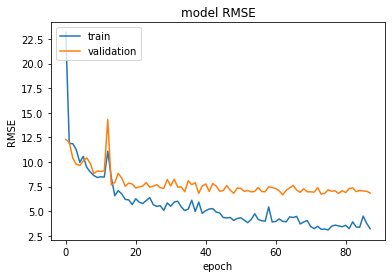

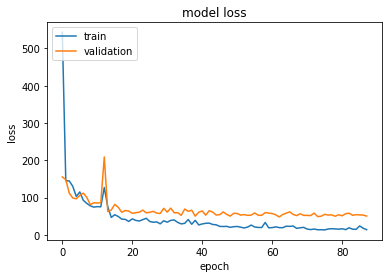

In [317]:
# list all data in history
import matplotlib.pyplot as plt
print(history.history.keys())
# summarize history for accuracy

# When metrics is accuracy:
# plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
# plt.title('model accuracy')
# plt.ylabel('accuracy')

# When metrics is RMSE:
plt.plot(history.history['rmse'])
plt.plot(history.history['val_rmse'])
plt.title('model RMSE')
plt.ylabel('RMSE')

plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [318]:
print('Evaluation')
model.evaluate(test_x,test_y)

Evaluation
3/3 [==============================] - 0s 3ms/step - loss: 41.3112 - rmse: 6.1066


[41.31120300292969, 6.106617450714111]

In [172]:
#@title Declaring Prediction Function
# Declaring Prediction Function
def predict_not_zscored_sample (x):
  x_original = []
  refer_cols = ['Mu33','Mu22','Pu','L','Cb','Delta']
  col_num = 0
  for i in x[:6]:
    x_original.append((i - Dataset[refer_cols[col_num]].mean())/Dataset[refer_cols[col_num]].std(ddof=0))
    col_num += 1
  x_original.append(x[6])
  # Convert to numpy array
  x_m = np.array([x_original])
  Prediction = model.predict(x_m)
  return (Prediction)  

def predict(model_input):
  y_index = ['h','b','tf','tw']
  if type(model_input) is list:
    print('Prediction results:')
    c1=0
    for i in (predict_not_zscored_sample(np.array(model_input))[0]):
      print('{0} : {1:.2f}'.format(y_index[c1],i))
      c1+=1
  else:
    model_input = r'%s' % model_input 
    prediction_data = pd.read_excel(model_input)
    prediction_data_x = np.column_stack((prediction_data.Mu33.values , prediction_data.Mu22.values, prediction_data.Pu.values, prediction_data.L.values, prediction_data.Cb.values, prediction_data.Delta.values, prediction_data.L1tb.values))
    
    x_index = ['Mu33','Mu22','Pu', 'L', 'Cb' , 'Delta' , 'L1tb']  
    list_x = []
    for i in prediction_data_x:
      str_x = ''
      c2 = 0
      for j in i:
        str_x += '  ' + '{0}={1:.2f}'.format(x_index[c2],list(i)[c2])
        c2 += 1
      list_x.append(str_x)
    if 'h' in prediction_data.columns:
      prediction_data_y = np.column_stack((prediction_data.h.values, prediction_data.b.values, prediction_data.tf.values, prediction_data.tw.values))

      for i in range (0, len(prediction_data)):
        pred = predict_not_zscored_sample (prediction_data_x[i])
        counter_y_index = 0
        print('Prediction sample %i' % (i+1) ,'\n', list_x[i].strip())
        for j in list(pred[0]):
          err = abs(prediction_data_y[i][counter_y_index]*100 - j)*100/(prediction_data_y[i][counter_y_index]*100)
          print ('{0}: {1:.2f} -> prediction : {2:.2f}   err = %{3:.2f}'.format(y_index[counter_y_index],prediction_data_y[i][counter_y_index]*100,j,err))
          counter_y_index += 1
    elif (('Mu33' in prediction_data.columns) ==True) and (('h' in prediction_data.columns) ==False):
      prediction_data_x = np.column_stack((prediction_data.Mu33.values , prediction_data.Mu22.values, prediction_data.Pu.values, prediction_data.L.values, prediction_data.Cb.values, prediction_data.Delta.values, prediction_data.L1tb.values))
      for i in range (0, len(prediction_data)):
        pred = predict_not_zscored_sample (prediction_data_x[i])
        counter_y_index = 0
        print('Prediction sample %i' % (i+1) ,'\n', list_x[i].strip())
        for j in list(pred[0]):
          # err = abs(prediction_data_y[i][counter_y_index]*100 - j)*100/(prediction_data_y[i][counter_y_index]*100)
          # print ('{0}: {1:.2f} -> prediction : {2:.2f}   err = %{3:.2f}'.format(y_index[counter_y_index],prediction_data_y[i][counter_y_index]*100,j,err))
          print ('{0} : {1:.2f} '.format(y_index[counter_y_index],j))
          counter_y_index += 1

In [173]:
# Get predictions on your dataset - input the dataset url 

# predict('https://github.com/FarshadAmiri/Structural_Engineering/blob/master/PredictionSet.xlsx?raw=true')
# predict ('https://github.com/FarshadAmiri/Structural_Engineering/blob/master/PredictionSet2.xlsx?raw=true')
predict ([-37534.9,142366.1,-180940,4,2.213,0.0251,1])

Prediction results:
h : 47.70
b : 42.75
tf : 7.67
tw : 4.76


In [ ]:
model.weights

[<tf.Variable 'dense_24/kernel:0' shape=(7, 128) dtype=float32, numpy=
 array([[ 5.91579415e-02,  4.83634979e-01,  5.15956521e-01,
         -4.75628003e-02, -1.99126482e-01,  2.39056405e-02,
          8.34505074e-03,  3.92899036e-01, -1.05549823e-02,
         -7.77740002e-01,  2.09304005e-01, -4.92738634e-01,
         -8.46317485e-02,  1.94475185e-02, -7.74329901e-02,
         -4.22340184e-01, -4.19141315e-02, -1.62647650e-01,
          2.19981164e-01, -2.94852499e-02, -8.47331658e-02,
          6.99260116e-01,  5.44610247e-02,  1.19871557e-01,
          7.44826123e-02, -5.48740290e-03,  3.50443780e-01,
          8.05990174e-02, -1.55043006e-01, -3.88121217e-01,
          1.57183588e-01, -9.58751962e-02, -6.82875097e-01,
          5.73661804e-01,  8.32465068e-02, -2.09014136e-02,
         -1.47830501e-01,  2.83999324e-01,  1.34802982e-01,
         -6.83121622e-01, -7.15055317e-02, -1.61737036e-02,
         -1.99905932e-01, -2.71259826e-02, -4.56348807e-02,
          7.49116018e-02, -1.

In [147]:
# Save model
import os

model_name = 'model_f1'
model.save(model_name)
!zip -r /content/{model_name+'.zip'}    {model_name}

INFO:tensorflow:Assets written to: model_f1/assets
  adding: model_f1/ (stored 0%)
  adding: model_f1/variables/ (stored 0%)
  adding: model_f1/variables/variables.index (deflated 73%)
  adding: model_f1/variables/variables.data-00000-of-00001 (deflated 5%)
  adding: model_f1/saved_model.pb (deflated 92%)
  adding: model_f1/assets/ (stored 0%)


In [22]:
# Load model
zip_file_path = '/content/model_2.zip'

import zipfile
with zipfile.ZipFile(zip_file_path,"r") as zip_ref:
    zip_ref.extractall("/content/")

model = keras.models.load_model(zip_file_path[:-4])